<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<br><h1 style="list-style:none"> A1 - Regression Model Development</h1><br>
<b>DAT-5303 | Machine Learning</b><br>
Fabian Jaskotka<br>
Hult International Business School<br><br>

<p>Apprentice Chef, Inc.<br>
   How much revenue to expect from each customer within their first year?<br><br>
   Tasks: 
</p>
    <ul>
        <li>Analyze Data</li>
        <li>Developing Top Insights</li>
        <li> Build machine learning model to predict revenue</li>
    </ul>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<br>

# Loading Data

In [1]:
#importing necessary packages
import random as rand
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gender_guesser.detector as gender
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import sklearn.linear_model 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler


In [2]:
#setting seed
rand.seed(a=327)

#defining filepath for dataset
file = "./datasets/Apprentice_Chef_Dataset.xlsx"

#matching datatypes
data_types = {"AVG_CLICKS_PER_VISIT" : float}

#importing dataset
chef = pd.read_excel(io = file,
                    dtype = data_types)

#changing column name of Largest_Order_Size
chef.columns = ['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME',
       'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
       'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
       'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME',
       'AVG_NUMBER_MEALS', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
       'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED']


# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {chef.shape[0]}
Features:     {chef.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     28



In [3]:
chef.head(n=10)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,AVG_NUMBER_MEALS,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.00,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,...,0,2,0,0,33.4,1,0,1,17.0,0
1,1365.00,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,...,0,2,0,0,84.8,1,0,3,13.0,170
2,800.00,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,...,0,1,0,0,63.0,1,0,2,16.0,0
3,600.00,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,...,0,3,0,0,43.8,1,0,2,14.0,0
4,1490.00,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,...,0,8,0,0,84.8,1,1,3,12.0,205
5,1550.00,1,Genna Lannister,genna.lannister@protonmail.com,Genna,Lannister,36,2,9,1,...,0,3,1,0,78.8,1,1,3,12.0,0
6,1430.00,1,Olene Tyrell,olene.tyrell@mcdonalds.com,Olene,Tyrell,61,7,6,2,...,1,2,1,1,84.8,1,0,3,12.0,169
7,1321.25,1,Stevron Frey,stevron.frey@travelers.com,Stevron,Frey,13,1,12,3,...,0,0,0,0,63.0,1,0,1,15.0,0
8,1505.00,1,Praed,praed@nike.com,Praed,Praed,16,1,12,5,...,0,1,0,0,63.0,1,0,2,18.0,0
9,1493.00,0,Alysane Mormont,alysane.mormont@caterpillar.com,Alysane,Mormont,95,3,6,8,...,0,2,1,0,84.8,1,1,3,14.0,147


## Analyzing Distribution of Revenue

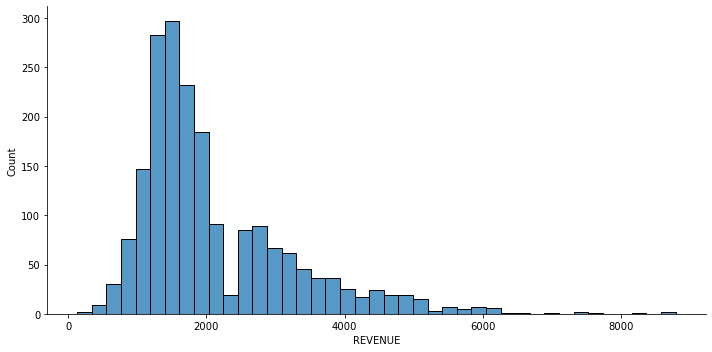

In [4]:
#building histogram for feature revenue
sns.displot(x = 'REVENUE',
           data = chef,
           aspect = 2,
           height = 5)

#plotting the diagram
plt.show()

In [5]:
chef.iloc[: , 15:].describe()
print(chef['TOTAL_MEALS_ORDERED'])

0        14
1        87
2        15
3        13
4        47
       ... 
1941     87
1942    244
1943     57
1944     74
1945    188
Name: TOTAL_MEALS_ORDERED, Length: 1946, dtype: int64


# Data Cleaning

## Anomaly Handling

In [6]:
#examining missing values
chef.isnull().sum()

#dropping the column Family_Name
chef = chef.drop(['FAMILY_NAME'], axis = 1)

In [7]:
chef.isnull().any().any()

False

Examining those that seem to have a lot of zero values

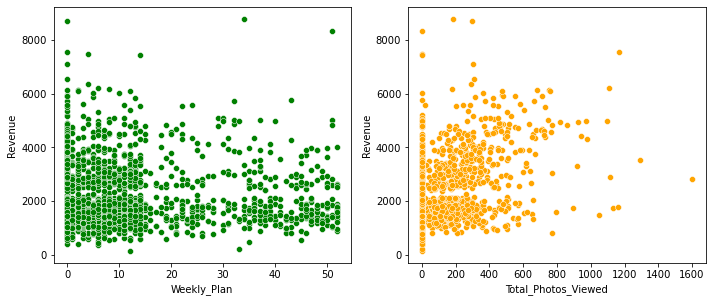

In [8]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['WEEKLY_PLAN'], # ever having a weekly plan?
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Weekly_Plan')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['TOTAL_PHOTOS_VIEWED'], 
                y = chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Total_Photos_Viewed')
plt.ylabel(ylabel = 'Revenue')


#cleaning layout and displaying results
plt.tight_layout()
plt.show()

# Feature Engineering

## Transformation of Revenue

In [9]:
#Logarithmic transformation of Revenue
chef['LOG_REVENUE'] = np.log10(chef['REVENUE'])

## Attributes with many zeroes

In [10]:
#counting number of zeroes
WEEKLY_PLAN_ZEROES = len(chef['WEEKLY_PLAN'][chef['WEEKLY_PLAN'] == 0]) 
PHOTOS_VIEWED_ZEROES = len(chef['TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] == 0])


# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
Weekly_Plan    | {WEEKLY_PLAN_ZEROES}\t\t{len(chef) - WEEKLY_PLAN_ZEROES}
Photos_Viewed  | {PHOTOS_VIEWED_ZEROES}\t\t{len(chef) - PHOTOS_VIEWED_ZEROES}
""")


                 No		Yes
               ---------------------
Weekly_Plan    | 468		1478
Photos_Viewed  | 1140		806



In [11]:
#dummy variables
chef['EVER_WEEKLY_PLAN'] = 0
chef['PHOTOS_VIEWED_AT_ALL'] = 0


#creating loop to iterate over dataset
for index, value in chef.iterrows():
    
    #assigning 1 to customers that already had weekly plans
    if chef.loc[index, 'WEEKLY_PLAN'] > 0:
        chef.loc[index, 'EVER_WEEKLY_PLAN'] = 1
        
    #assigning 1 to customers that already viewed photos
    if chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chef.loc[index, 'PHOTOS_VIEWED_AT_ALL'] = 1
        
        
#checking results
chef[['EVER_WEEKLY_PLAN', 'PHOTOS_VIEWED_AT_ALL']].head(n=10)

,EVER_WEEKLY_PLAN,PHOTOS_VIEWED_AT_ALL
0,0,0
1,1,1
2,1,0
3,1,0
4,1,1
5,0,0
6,1,1
7,1,0
8,1,0
9,1,1


## Delivery
Creating Feature: Punctual Delivery

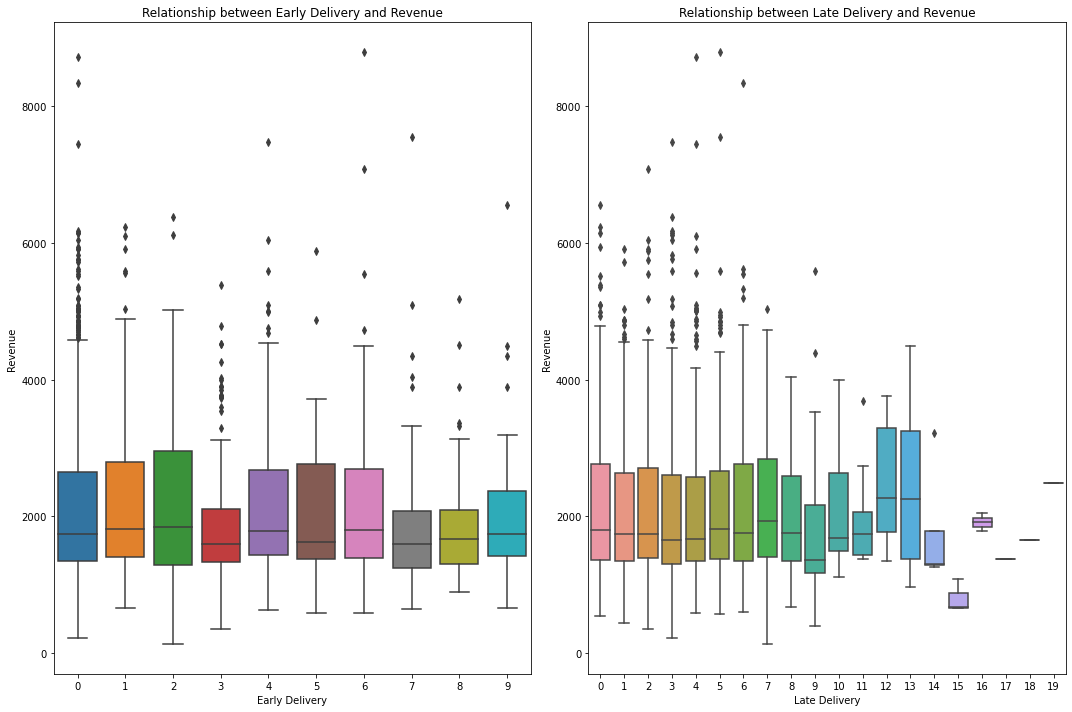


Count of Deliveries

----------
Early Deliveries
----------
0    1167
1     139
2     128
3     153
4     157
5      37
6      43
7      43
8      45
9      34
Name: EARLY_DELIVERIES, dtype: int64

----------
Late Deliveries
----------
0     319
1     373
2     332
3     273
4     223
5     127
6      98
7      66
8      39
9      36
10     25
11      9
12      6
13      8
14      4
15      3
16      2
17      1
18      1
19      1
Name: LATE_DELIVERIES, dtype: int64




In [12]:
#setting figure size
fig, ax = plt.subplots(figsize = (15,10))
                       
#################
#Early Delivery  
#################

#first plot window
plt.subplot(1,2,1)

sns.boxplot(x = 'EARLY_DELIVERIES',
           y = 'REVENUE',
           data = chef)

# titles and labels
plt.title(label   = 'Relationship between Early Delivery and Revenue')
plt.xlabel(xlabel = 'Early Delivery')
plt.ylabel(ylabel = 'Revenue')


#################
#Late Delivery  
#################

#first plot window
plt.subplot(1,2,2)

sns.boxplot(x = 'LATE_DELIVERIES',
           y = 'REVENUE',
           data = chef)

# titles and labels
plt.title(label   = 'Relationship between Late Delivery and Revenue')
plt.xlabel(xlabel = 'Late Delivery')
plt.ylabel(ylabel = 'Revenue')
                       
plt.tight_layout()
plt.show()
    
# printing value counts for early and late deliveries
print(f"""
Count of Deliveries
==================

----------
Early Deliveries
----------
{chef['EARLY_DELIVERIES'].value_counts(normalize = False).sort_index()}

----------
Late Deliveries
----------
{chef['LATE_DELIVERIES'].value_counts(normalize = False).sort_index()}

""")

In [13]:
#creating empty dummy variable
chef['PUNCTUAL_DELIVERIES'] = 0


#loop running over dataset
for index, value in chef.iterrows():
    
    if chef.loc[index, 'LATE_DELIVERIES'] == 0 and chef.loc[index, 'EARLY_DELIVERIES'] == 0:
        chef.loc[index, 'PUNCTUAL_DELIVERIES'] = 1
        
#examining distribution of dummy variable        
chef['PUNCTUAL_DELIVERIES'].value_counts()

0    1752
1     194
Name: PUNCTUAL_DELIVERIES, dtype: int64

## Cancellation

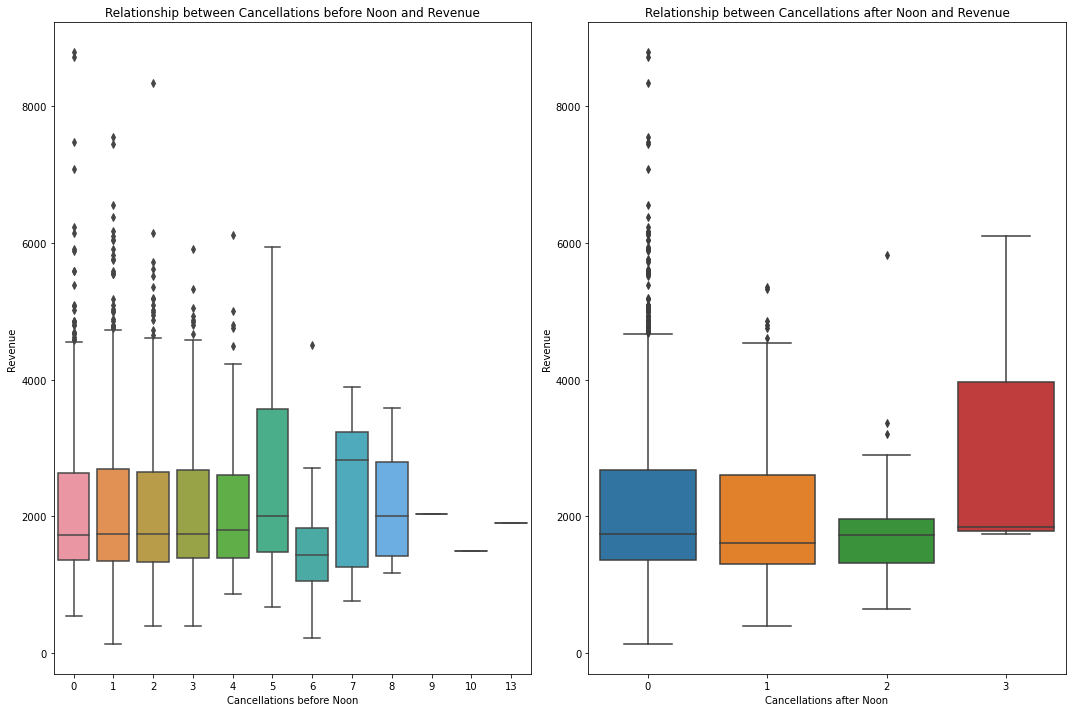


Count of Deliveries

----------
Cancellations before noon
----------
0     667
1     567
2     331
3     189
4     105
5      43
6      23
7      11
8       7
9       1
10      1
13      1
Name: CANCELLATIONS_BEFORE_NOON, dtype: int64


----------
Cancellations after noon
----------
0    1667
1     238
2      38
3       3
Name: CANCELLATIONS_AFTER_NOON, dtype: int64





In [14]:
#setting figure size
fig, ax = plt.subplots(figsize = (15,10))
                       
#################
#Early Delivery  
#################

#first plot window
plt.subplot(1,2,1)

sns.boxplot(x = 'CANCELLATIONS_BEFORE_NOON',
           y = 'REVENUE',
           data = chef)

# titles and labels
plt.title(label   = 'Relationship between Cancellations before Noon and Revenue')
plt.xlabel(xlabel = 'Cancellations before Noon')
plt.ylabel(ylabel = 'Revenue')


#################
#Late Delivery  
#################

#first plot window
plt.subplot(1,2,2)

sns.boxplot(x = 'CANCELLATIONS_AFTER_NOON',
           y = 'REVENUE',
           data = chef)

# titles and labels
plt.title(label   = 'Relationship between Cancellations after Noon and Revenue')
plt.xlabel(xlabel = 'Cancellations after Noon')
plt.ylabel(ylabel = 'Revenue')
                       
plt.tight_layout()
plt.show()
    
# printing value counts for early and late deliveries
print(f"""
Count of Deliveries
==================

----------
Cancellations before noon
----------
{chef['CANCELLATIONS_BEFORE_NOON'].value_counts(normalize = False).sort_index()}


----------
Cancellations after noon
----------
{chef['CANCELLATIONS_AFTER_NOON'].value_counts(normalize = False).sort_index()}


""")

### Cancellations at all

In [15]:
#Creating dummy variable
chef['CANCELLATIONS'] = 0

#looping over dataset
for index, value in chef.iterrows():
    
    if chef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 0 or chef.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        chef.loc[index, 'CANCELLATIONS'] = 1
        
chef['CANCELLATIONS'].value_counts()

1    1374
0     572
Name: CANCELLATIONS, dtype: int64

### Total Cancellations

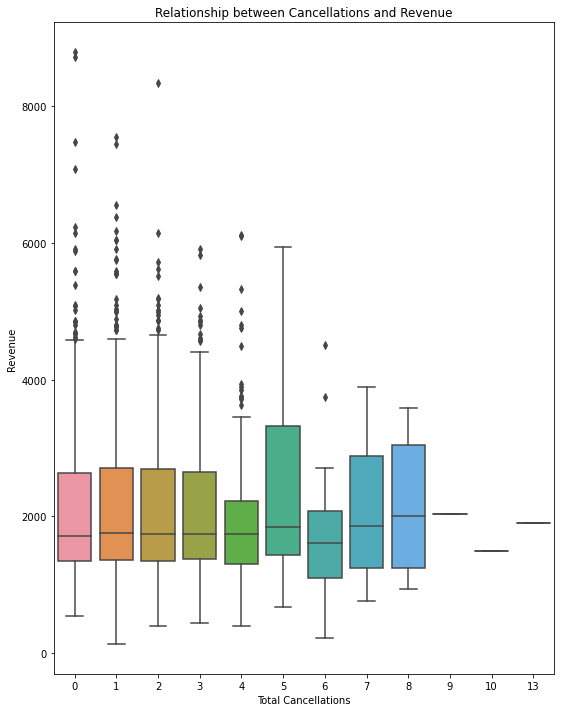


Count of Cancellations

----------
Cancellations total
----------
0     572
1     583
2     336
3     224
4     121
5      58
6      28
7      12
8       9
9       1
10      1
13      1
Name: TOTAL_CANCELLATIONS, dtype: int64




In [16]:
#total cancellations
chef['TOTAL_CANCELLATIONS'] = chef['CANCELLATIONS_BEFORE_NOON'] + chef['CANCELLATIONS_AFTER_NOON']


#setting figure size
fig, ax = plt.subplots(figsize = (15,10))
                       
#################
#Early Delivery  
#################

#first plot window
plt.subplot(1,2,1)

sns.boxplot(x = 'TOTAL_CANCELLATIONS',
           y = 'REVENUE',
           data = chef)

# titles and labels
plt.title(label   = 'Relationship between Cancellations and Revenue')
plt.xlabel(xlabel = 'Total Cancellations')
plt.ylabel(ylabel = 'Revenue')

plt.tight_layout()
plt.show()

# printing value counts for early and late deliveries
print(f"""
Count of Cancellations
==================

----------
Cancellations total
----------
{chef['TOTAL_CANCELLATIONS'].value_counts(normalize = False).sort_index()}

""")

#### Transformation of Total Cancellations

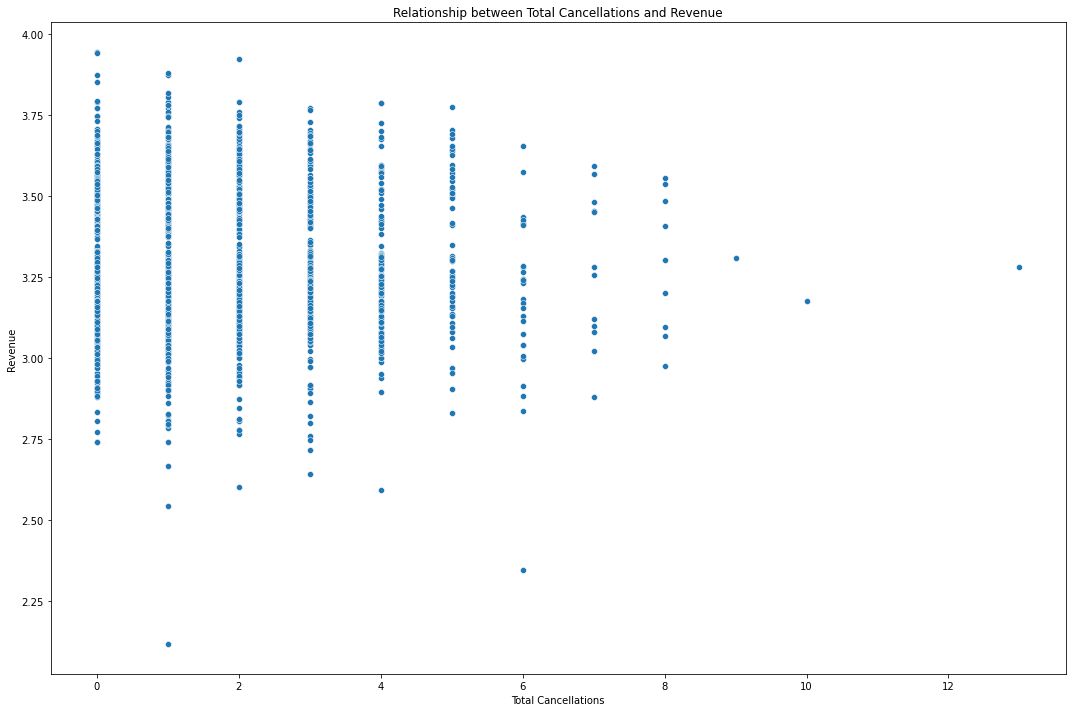

In [17]:
#setting figure size
fig, ax = plt.subplots(figsize = (15,10))
                       

#creating boxplot
sns.scatterplot(x = 'TOTAL_CANCELLATIONS',
           y = 'LOG_REVENUE',
           data = chef)

# titles and labels
plt.title(label   = 'Relationship between Total Cancellations and Revenue')
plt.xlabel(xlabel = 'Total Cancellations')
plt.ylabel(ylabel = 'Revenue')

plt.tight_layout()
plt.show()

#logarithmic transformation
chef['LOG_TOTAL_CANCELLATIONS'] = np.log10(chef['TOTAL_CANCELLATIONS']+1)

### After Noon per Meal Ordered

In [18]:
#cancellation after noon per meal ordered
chef['CANCELLATION_AFTER_NOON_PMO'] = chef['CANCELLATIONS_AFTER_NOON'] / chef['TOTAL_MEALS_ORDERED']

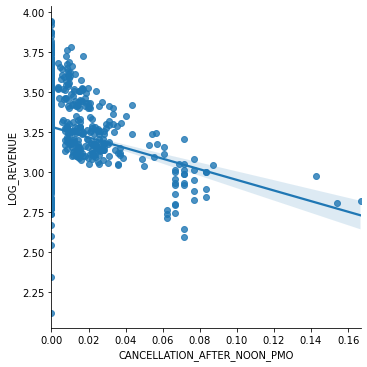

In [19]:
#analyzing relationship in plot
sns.lmplot(x = 'CANCELLATION_AFTER_NOON_PMO',
          y = 'LOG_REVENUE',
          data = chef)
plt.show()

## Customer Service Contacts

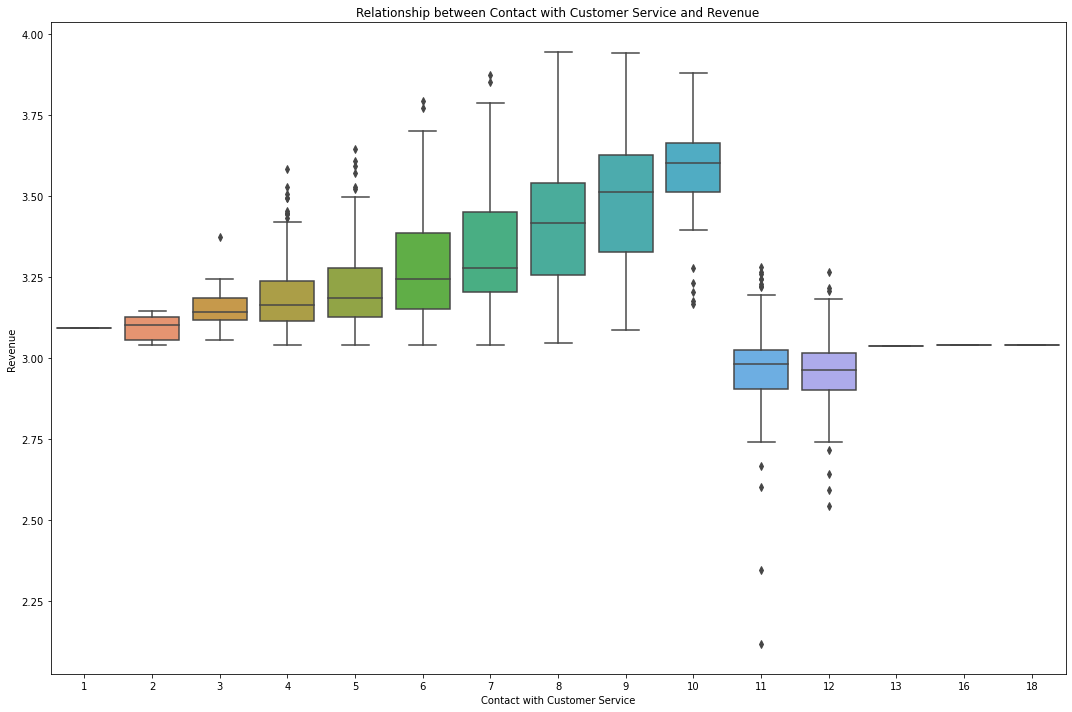


Count of Customer Service Contact

----------
Total count
----------
1       1
2       8
3      53
4     180
5     292
6     356
7     378
8     256
9     138
10     68
11    121
12     92
13      1
16      1
18      1
Name: CONTACTS_W_CUSTOMER_SERVICE, dtype: int64




In [20]:
#setting figure size
fig, ax = plt.subplots(figsize = (15,10))
                       

#creating boxplot
sns.boxplot(x = 'CONTACTS_W_CUSTOMER_SERVICE',
           y = 'LOG_REVENUE',
           data = chef)

#titles and labels
plt.title(label   = 'Relationship between Contact with Customer Service and Revenue')
plt.xlabel(xlabel = 'Contact with Customer Service')
plt.ylabel(ylabel = 'Revenue')

plt.tight_layout()
plt.show()

# printing value counts
print(f"""
Count of Customer Service Contact
==================

----------
Total count
----------
{chef['CONTACTS_W_CUSTOMER_SERVICE'].value_counts(normalize = False).sort_index()}

""")

### Transformation of Customer Service Contacts

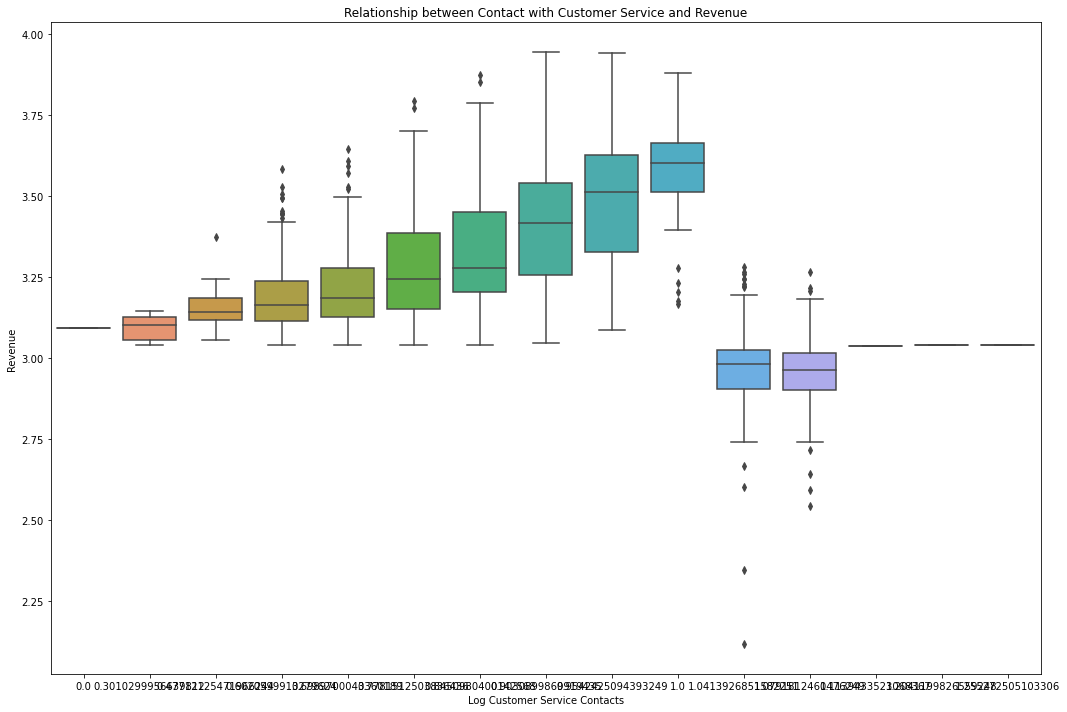

In [21]:
#creating logarithmic transformation of Contacts with customer service
chef['LOG_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(chef['CONTACTS_W_CUSTOMER_SERVICE'])

#setting figure size
fig, ax = plt.subplots(figsize = (15,10))

#creating boxplot
sns.boxplot(x = 'LOG_CONTACTS_W_CUSTOMER_SERVICE',
           y = 'LOG_REVENUE',
           data = chef)

# titles and labels
plt.title(label   = 'Relationship between Contact with Customer Service and Revenue')
plt.xlabel(xlabel = 'Log Customer Service Contacts')
plt.ylabel(ylabel = 'Revenue')

plt.tight_layout()
plt.show()

### Customer support contact dummy

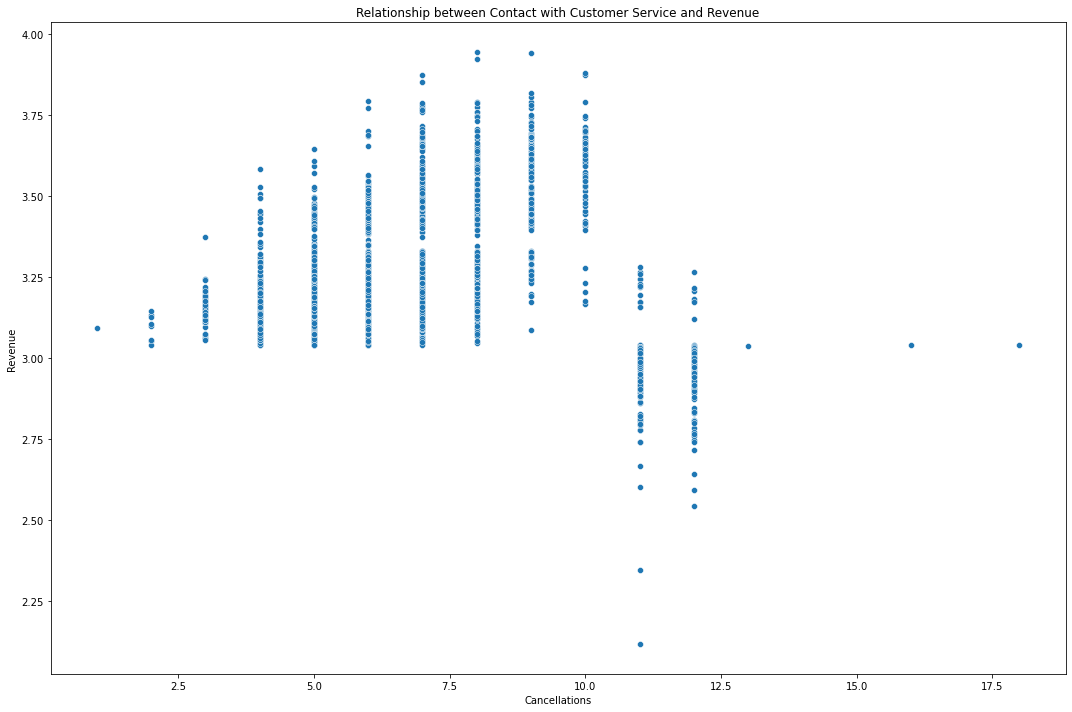

In [22]:
#setting figure size
fig, ax = plt.subplots(figsize = (15,10))
                       

#creating boxplot
sns.scatterplot(x = 'CONTACTS_W_CUSTOMER_SERVICE',
           y = 'LOG_REVENUE',
           data = chef)

# titles and labels
plt.title(label   = 'Relationship between Contact with Customer Service and Revenue')
plt.xlabel(xlabel = 'Cancellations')
plt.ylabel(ylabel = 'Revenue')

plt.tight_layout()
plt.show()

In [23]:
#creating placeholder list
placeholder_lst = []

#for loop to loop over Contacts_W_Customer service
for item in chef['CONTACTS_W_CUSTOMER_SERVICE']:
    
    if item <= 10:
        placeholder_lst.append(0)
        
    else:
        placeholder_lst.append(1)
        
chef['CONTACTS_W_CUSTOMER_SERVICE_ABOVETEN'] = pd.Series(placeholder_lst)

### Customer Support Contact per Meal Ordered

In [24]:
#generating feature as ratio of service requests per meal ordered
chef['CONTACTS_W_CUSTOMER_SERVICE_PMO'] =  chef['TOTAL_MEALS_ORDERED'] / chef['CONTACTS_W_CUSTOMER_SERVICE']

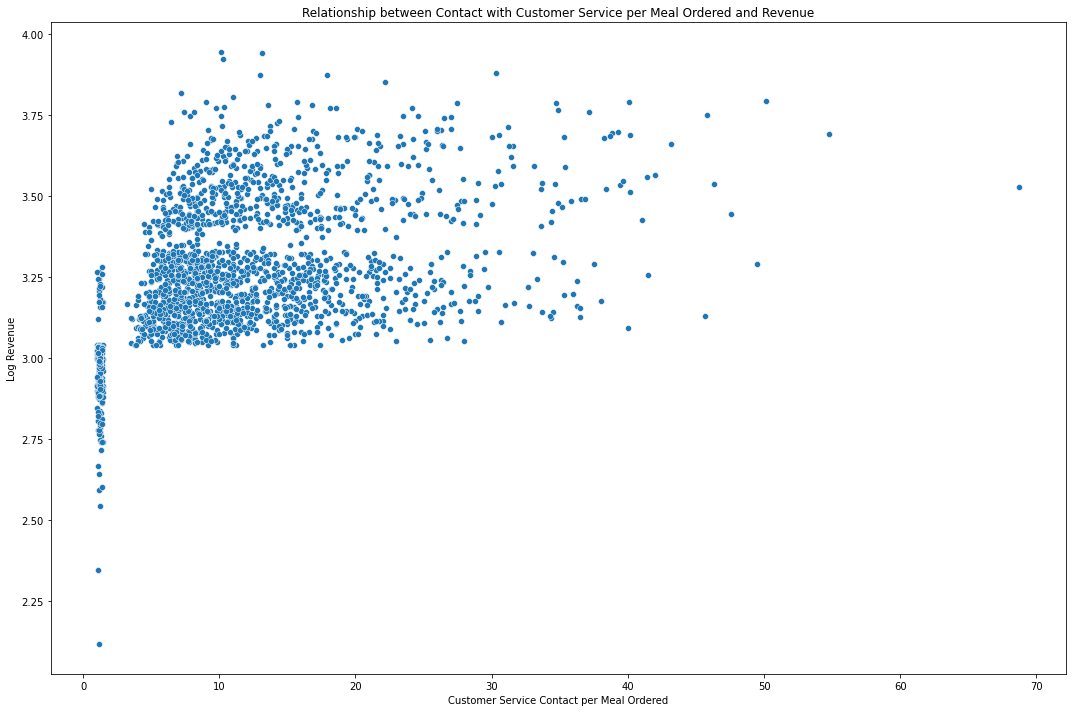

In [25]:
#setting figure size
fig, ax = plt.subplots(figsize = (15,10))
                       

#creating boxplot
sns.scatterplot(x = 'CONTACTS_W_CUSTOMER_SERVICE_PMO',
           y = 'LOG_REVENUE',
           data = chef)

# titles and labels
plt.title(label   = 'Relationship between Contact with Customer Service per Meal Ordered and Revenue')
plt.xlabel(xlabel = 'Customer Service Contact per Meal Ordered')
plt.ylabel(ylabel = 'Log Revenue')

plt.tight_layout()
plt.show()

#### Transformation of Log Customer Service Contacts per Meal Ordered

In [26]:
#transforming variable
chef['LOG_CONTACTS_W_CUSTOMER_SERVICE_PMO'] = np.log10(chef['CONTACTS_W_CUSTOMER_SERVICE_PMO'])

#### Customer Service Contacts per Meal Ordered dummy

In [27]:
#placeholder list
placeholder_lst = []
#dummy variables for CONTACTS_W_CUSTOMER_SERVICE_PMO
for item in chef['LOG_CONTACTS_W_CUSTOMER_SERVICE_PMO']:
    if item > 0.25:
        placeholder_lst.append(1)
        
    else:
        placeholder_lst.append(0)

#adding new feature to dataset
chef['CS_PMO_MIN_2'] = pd.Series(placeholder_lst)

## Total Meals Ordered

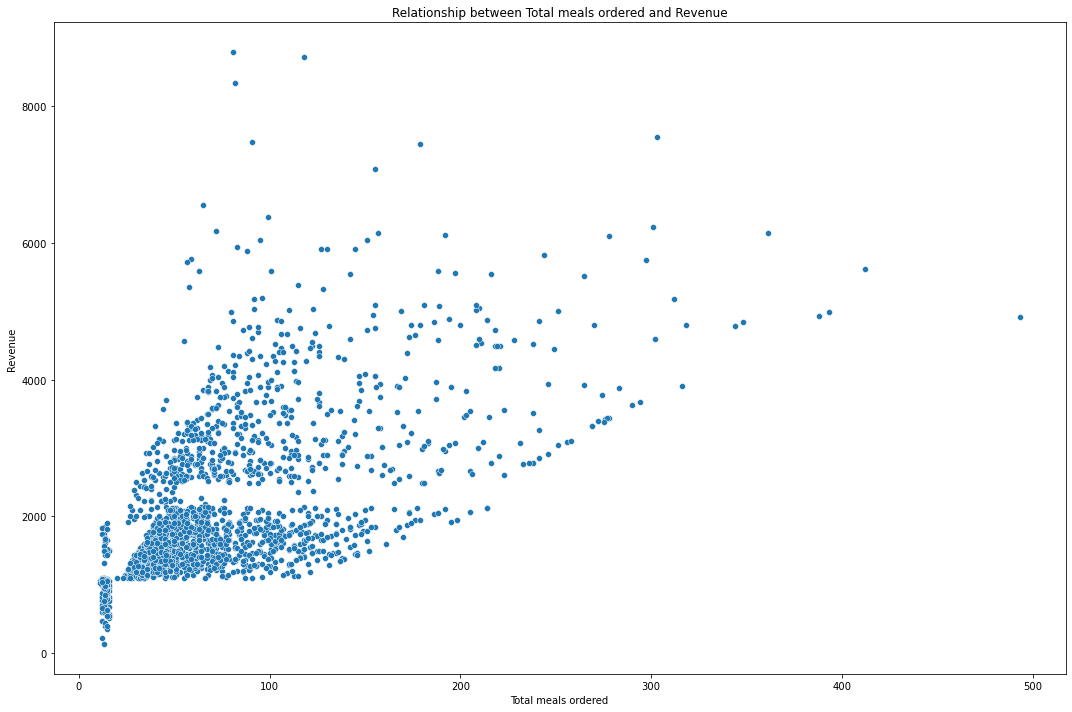

In [28]:
#setting figure size
fig, ax = plt.subplots(figsize = (15,10))
                       

#creating boxplot
sns.scatterplot(x = 'TOTAL_MEALS_ORDERED',
           y = 'REVENUE',
           data = chef)

# titles and labels
plt.title(label   = 'Relationship between Total meals ordered and Revenue')
plt.xlabel(xlabel = 'Total meals ordered')
plt.ylabel(ylabel = 'Revenue')

plt.tight_layout()
plt.show()

### Total Meals Ordered Dummy

In [29]:
#creating feature for above 20 meals ordered
placeholder_lst = []

for item in chef['TOTAL_MEALS_ORDERED']:
    if item > 20:
        placeholder_lst.append(1)
    else:
        placeholder_lst.append(0)

#adding new feature to dataset
chef['TOTAL_MEALS_ABOVE20'] = pd.Series(placeholder_lst)

In [30]:
#placeholder list
placeholder_lst = []

for value in chef['TOTAL_MEALS_ORDERED']:
    
    if value > 125:
        placeholder_lst.append(1)
        
    else:
        placeholder_lst.append(0)

#adding new feature to dataset
chef['MIN_125_MEALS_ORDERED'] = pd.Series(placeholder_lst)

### Transformation of Total Meals Ordered

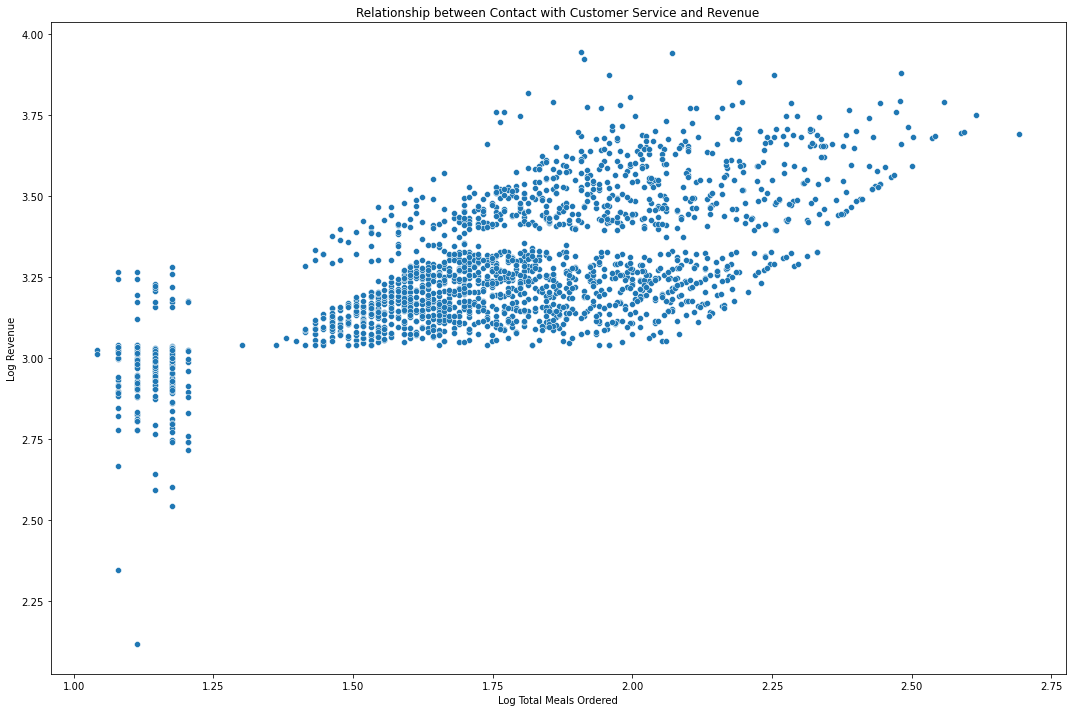

In [31]:
#logarythmic transformation of TOTAL_MEALS_ORDERED
chef['LOG_TOTAL_MEALS_ORDERED'] = np.log10(chef['TOTAL_MEALS_ORDERED'])

#setting figure size
fig, ax = plt.subplots(figsize = (15,10))
                       

#creating boxplot
sns.scatterplot(x = 'LOG_TOTAL_MEALS_ORDERED',
           y = 'LOG_REVENUE',
           data = chef)

# titles and labels
plt.title(label   = 'Relationship between Contact with Customer Service and Revenue')
plt.xlabel(xlabel = 'Log Total Meals Ordered')
plt.ylabel(ylabel = 'Log Revenue')

plt.tight_layout()
plt.show()

### Unique Meals per Total Meals Ordered

In [32]:
#creating feature
chef['UNIQUE_MEALS_PURCH_PMO'] = chef['UNIQUE_MEALS_PURCH'] / chef['TOTAL_MEALS_ORDERED']

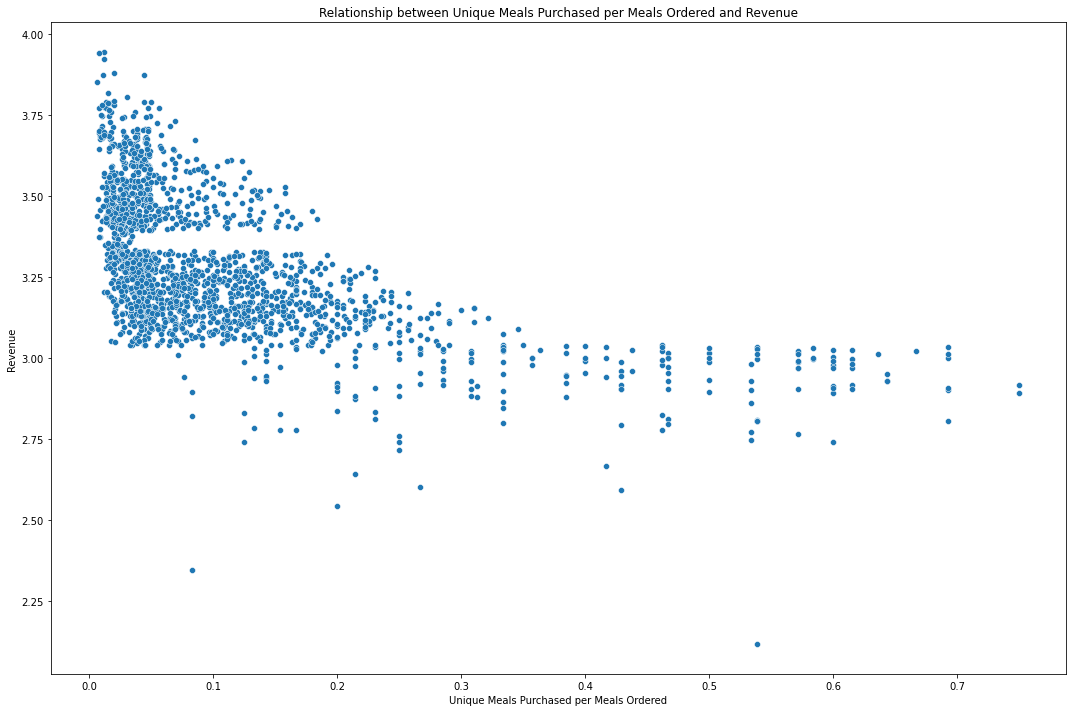

In [33]:
#setting figure size
fig, ax = plt.subplots(figsize = (15,10))
                       
#creating boxplot
sns.scatterplot(x = 'UNIQUE_MEALS_PURCH_PMO',
           y = 'LOG_REVENUE',
           data = chef)

# titles and labels
plt.title(label   = 'Relationship between Unique Meals Purchased per Meals Ordered and Revenue')
plt.xlabel(xlabel = 'Unique Meals Purchased per Meals Ordered')
plt.ylabel(ylabel = 'Revenue')

plt.tight_layout()
plt.show()

#### Unique Meals per Meals Ordered Dummy

In [34]:
#placeholder
placeholder_lst = []

#loop over variable
for item in chef['UNIQUE_MEALS_PURCH_PMO']:
    if item > 0.25:
        placeholder_lst.append(1)
    else:
        placeholder_lst.append(0)

#adding new feature to dataset
chef['UNIQUE_MEALS_PURCH_PMO_ABOVE25'] = pd.Series(placeholder_lst)

#### Transformation of Unique Meals per Meals Ordered

In [35]:
#transforming variable and creating new feature
chef['LOG_UNIQUE_MEALS_PURCH_PMO'] = np.log10(chef['UNIQUE_MEALS_PURCH_PMO'])

## Average Time per Site Visit

Creating Feature: Transformation of Average Time per Site Visit

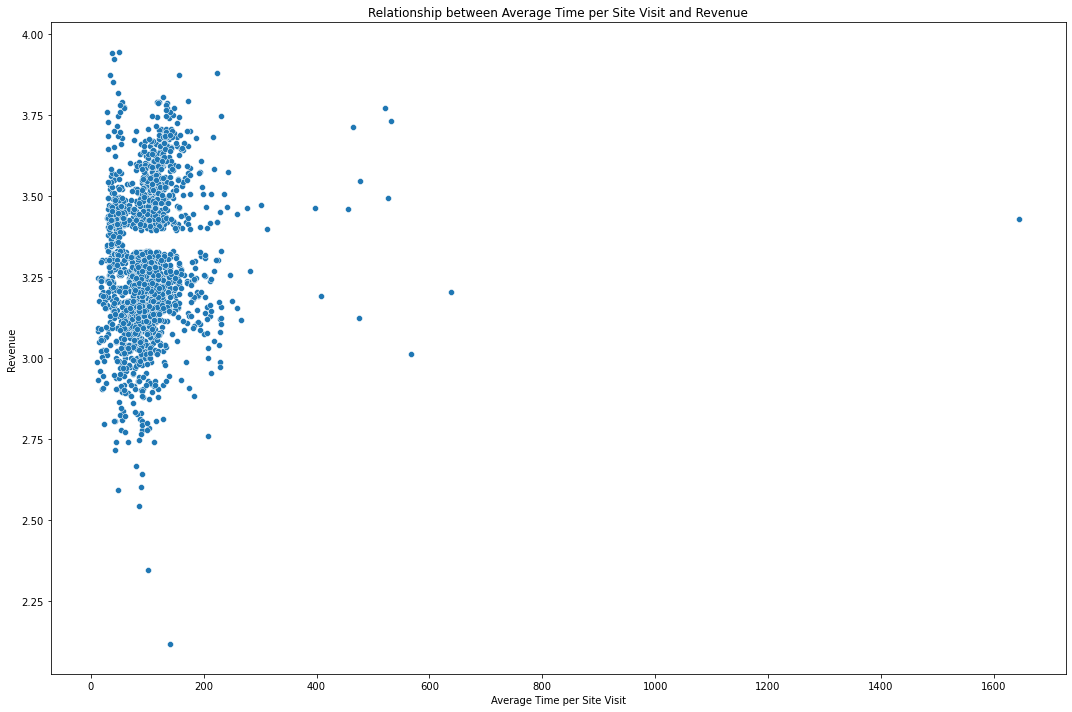

In [36]:
#setting figure size
fig, ax = plt.subplots(figsize = (15,10))
                       
#creating boxplot
sns.scatterplot(x = 'AVG_TIME_PER_SITE_VISIT',
           y = 'LOG_REVENUE',
           data = chef)

# titles and labels
plt.title(label   = 'Relationship between Average Time per Site Visit and Revenue')
plt.xlabel(xlabel = 'Average Time per Site Visit')
plt.ylabel(ylabel = 'Revenue')

plt.tight_layout()
plt.show()

#logarithmic transformation
chef['LOG_AVG_TIME_PER_SITE_VISIT'] = np.log10(chef['AVG_TIME_PER_SITE_VISIT'])

## Average Prep Video Time

Creating Feature: Transformation of Average Prep Video Time

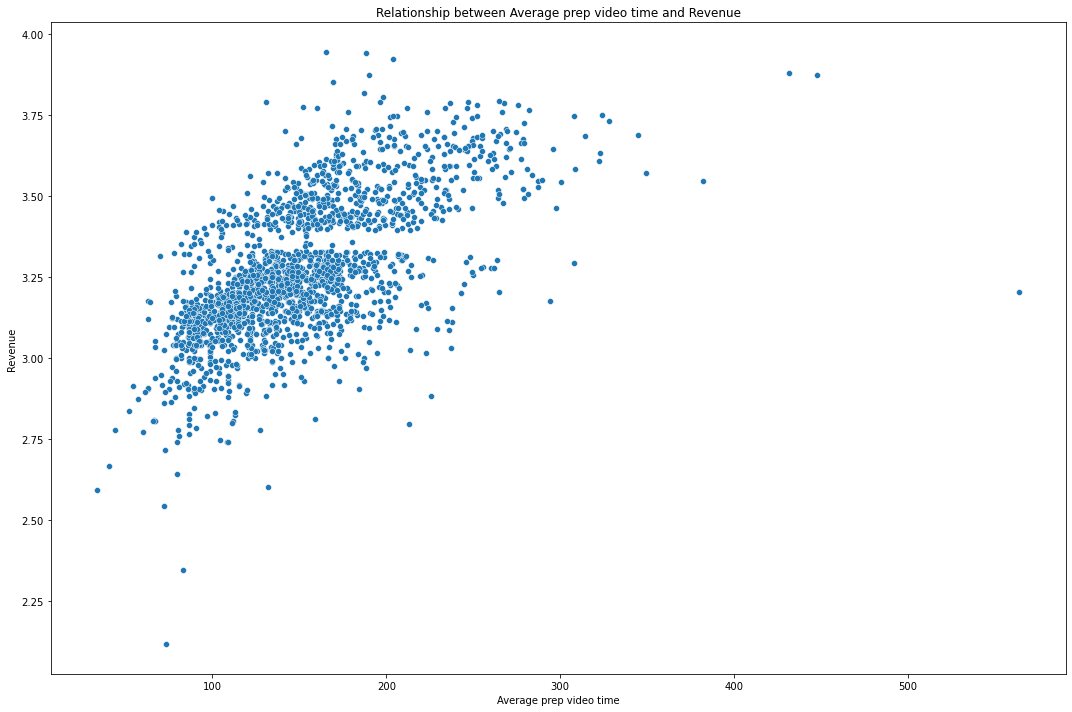

In [37]:
#setting figure size
fig, ax = plt.subplots(figsize = (15,10))
                       

#creating boxplot
sns.scatterplot(x = 'AVG_PREP_VID_TIME',
           y = 'LOG_REVENUE',
           data = chef)

# titles and labels
plt.title(label   = 'Relationship between Average prep video time and Revenue')
plt.xlabel(xlabel = 'Average prep video time')
plt.ylabel(ylabel = 'Revenue')

plt.tight_layout()
plt.show()

#logarythmic transformation
chef['LOG_AVG_PREP_VID_TIME'] = np.log10(chef['AVG_PREP_VID_TIME'])


## Average number of Meals

Creating Feature: Transformation of Average Number of Meals

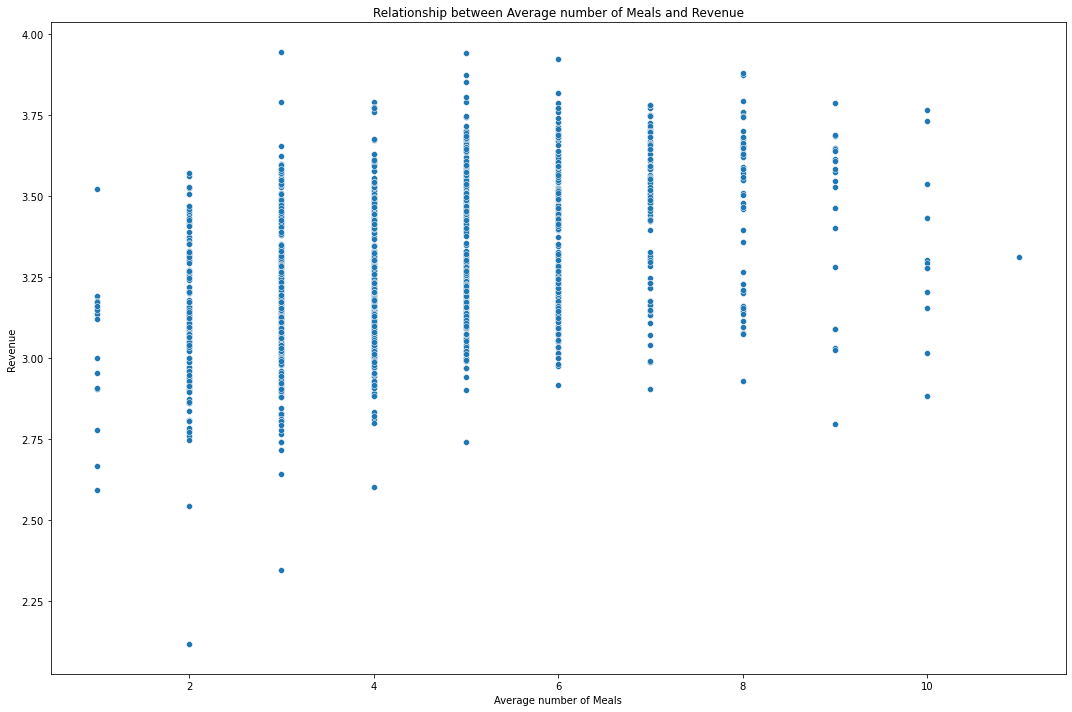

In [38]:
#setting figure size
fig, ax = plt.subplots(figsize = (15,10))
                       

#creating boxplot
sns.scatterplot(x = 'AVG_NUMBER_MEALS',
           y = 'LOG_REVENUE',
           data = chef)

# titles and labels
plt.title(label   = 'Relationship between Average number of Meals and Revenue')
plt.xlabel(xlabel = 'Average number of Meals')
plt.ylabel(ylabel = 'Revenue')

plt.tight_layout()
plt.show()

#logarythmic transformation
chef['LOG_AVG_NUMBER_MEALS'] = np.log10(chef['AVG_NUMBER_MEALS'])

## Total Photos Viewed

Creating Feature: Transformation of Total Photos Viewed

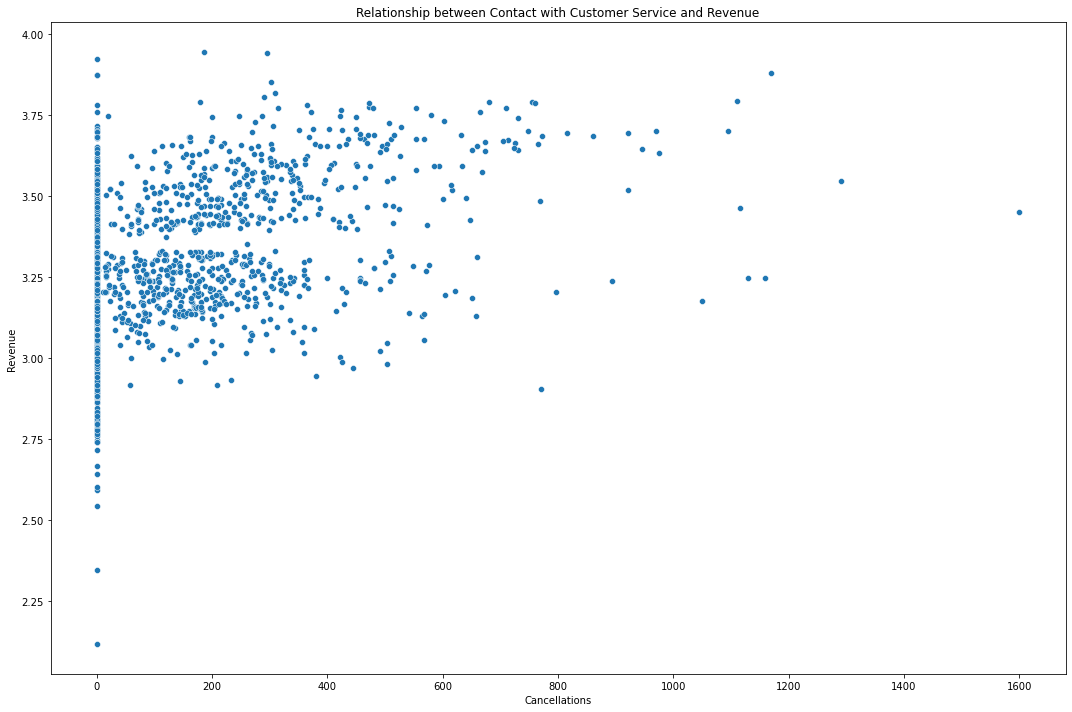

In [39]:
#setting figure size
fig, ax = plt.subplots(figsize = (15,10))
                       

#creating boxplot
sns.scatterplot(x = 'TOTAL_PHOTOS_VIEWED',
           y = 'LOG_REVENUE',
           data = chef)

# titles and labels
plt.title(label   = 'Relationship between Contact with Customer Service and Revenue')
plt.xlabel(xlabel = 'Cancellations')
plt.ylabel(ylabel = 'Revenue')

plt.tight_layout()
plt.show()

#logarythmic transformation
chef['LOG_TOTAL_PHOTOS_VIEWED'] = np.log10(chef['TOTAL_PHOTOS_VIEWED'] +1)

### Photos Viewed per Second Online

In [40]:
#developing ratio of photos viewed and average time on website
chef['PHOTOS_PER_TIME_ONLINE'] = chef['TOTAL_PHOTOS_VIEWED'] / chef['AVG_TIME_PER_SITE_VISIT']

## Preferences and Weekly Plan

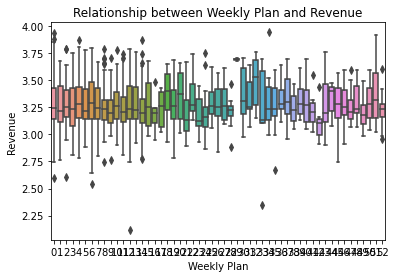

In [41]:
#creating boxplot
sns.boxplot(x = 'WEEKLY_PLAN',
           y = 'LOG_REVENUE',
           data = chef)

# titles and labels
plt.title(label   = 'Relationship between Weekly Plan and Revenue')
plt.xlabel(xlabel = 'Weekly Plan')
plt.ylabel(ylabel = 'Revenue')

plt.show()

In [42]:
#creating placeholder_lst
placeholder_lst = []

#looping over the dataset and determining which customers made use of customization
for index, value in chef.iterrows():
    if chef.loc[index, 'TASTES_AND_PREFERENCES'] == 1 and chef.loc[index, 'WEEKLY_PLAN'] > 0:
        placeholder_lst.append(1)
        
    else:
        placeholder_lst.append(0)
        
#creating new feature 'customized'
chef['CUSTOMIZED'] = pd.Series(placeholder_lst)

#examining distribution of new feature
chef['CUSTOMIZED'].value_counts()

1    1055
0     891
Name: CUSTOMIZED, dtype: int64

## Emails

Creating Feature: Professional, Personal, Junk

In [43]:
#generating empty list
placeholder_lst = []

for index, value in chef.iterrows():
    
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    placeholder_lst.append(split_email)
    
email_df = pd.DataFrame(placeholder_lst)

email_df.columns = ['0', 'EMAIL_DOMAIN']

#adding email domain feature to chef dataset
chef = pd.concat([chef, email_df['EMAIL_DOMAIN']], axis = 1)

In [44]:
#grouping mail domains in professional, personal and junk
professional_mail = ['@mmm.com', '@amex.com', '@apple.com', '@boeing.com', '@caterpillar.com', 
                    '@chevron.com', '@cisco.com', '@cocacola.com', '@disney.com', '@dupont.com', 
                    '@exxon.com', '@ge.org', '@goldmansacs.com', '@homedepot.com', '@ibm.com', 
                    '@intel.com', '@jnj.com', '@jpmorgan.com', '@mcdonalds.com', '@merck.com', 
                     '@microsoft.com', '@nike.com', '@pfizer.com', '@pg.com', '@travelers.com',
                    '@unitedtech.com', '@unitedhealth.com', '@verizon.com', '@visa.com', '@walmart.com']

personal_mail = ['@gmail.com', '@yahoo.com', '@protonmail.com']

junk_mail = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', '@msn.com', '@passport.com']


#placeholder list
placeholder_lst = []


#loop to go over domains and assign categories
for domain in chef['EMAIL_DOMAIN']:
    
    if '@' + domain in professional_mail:
        placeholder_lst.append('PROFESSIONAL_MAIL')
        
    elif '@' + domain in personal_mail:
        placeholder_lst.append('PERSONAL_MAIL')
        
    elif '@' + domain in junk_mail:
        placeholder_lst.append('JUNK_MAIL')

#creating new feature, gomain group
chef['DOMAIN_GROUP'] = pd.Series(placeholder_lst)

In [45]:
#one-hot encoding of domain group variable
one_hot_domain = pd.get_dummies(chef['DOMAIN_GROUP'])

#dropping categorical variables after encoding
chef = chef.drop('DOMAIN_GROUP', axis = 1 )

#adding dummy variables to dataset
chef = chef.join([one_hot_domain])


## Gender

Creating Features: MALE, FEMALE

In [46]:
#loading in the gender List
gender_file = "./datasets/chef_gender.xlsx"

gender = pd.read_excel(io = gender_file)

In [47]:
#creating dummy variables
one_hot_gender = pd.get_dummies(gender)

one_hot_gender.columns = ['andy', 'FEMALE', 'MALE', 'mostly_female', 
                          'mostly_male','unknown']

#dropping variables related to gender
chef = chef.drop(['FIRST_NAME', 'NAME'], axis = 1)

#joining dummy variables to chef
chef = chef.join(one_hot_gender.iloc[:, 1:3])

## Master Class Attendance

Creating Features: One masterclass attended, two masterclasses attended

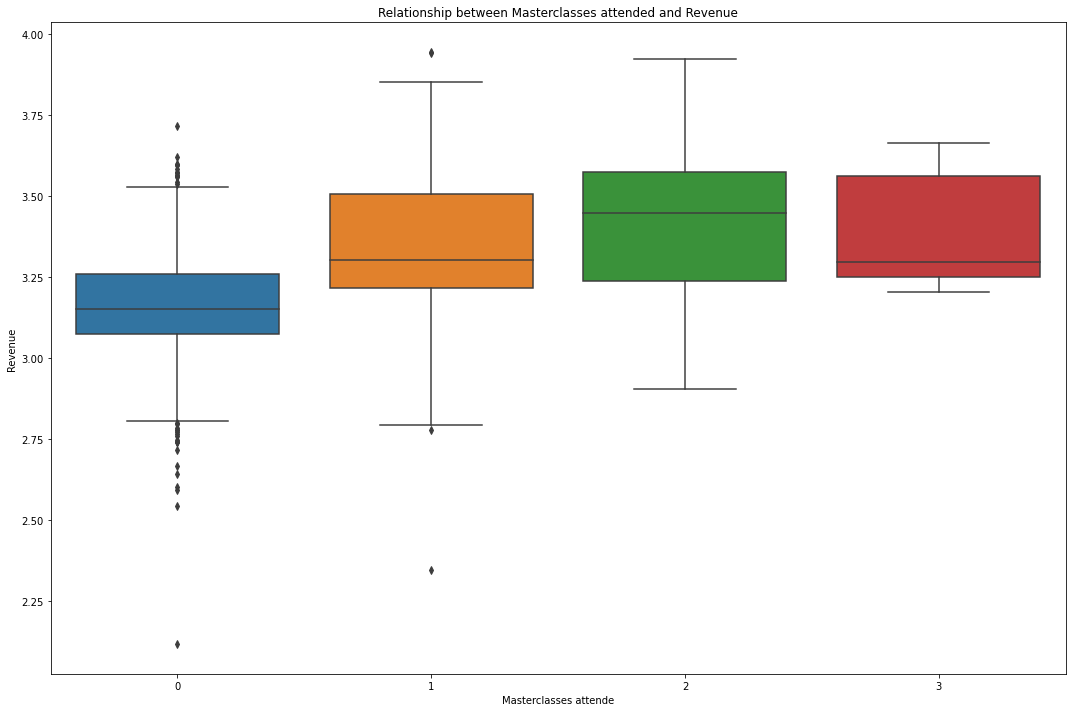

0    932
1    858
2    150
3      6
Name: MASTER_CLASSES_ATTENDED, dtype: int64


In [48]:
#setting figure size
fig, ax = plt.subplots(figsize = (15,10))
                       

#creating boxplot
sns.boxplot(x = 'MASTER_CLASSES_ATTENDED',
           y = 'LOG_REVENUE',
           data = chef)

# titles and labels
plt.title(label   = 'Relationship between Masterclasses attended and Revenue')
plt.xlabel(xlabel = 'Masterclasses attende')
plt.ylabel(ylabel = 'Revenue')

plt.tight_layout()
plt.show()

#analyzing distribution of variable
print(chef['MASTER_CLASSES_ATTENDED'].value_counts())

In [49]:
#creating dummy variable
master_dummy = pd.get_dummies(chef['MASTER_CLASSES_ATTENDED'])

#renaming the columns of the dummy dataset
master_dummy.columns = ['NO_MASTER_CLASSES_ATTENDED', 'ONE_MASTER_CLASSES_ATTENDED', 
                        'TWO_MASTER_CLASSES_ATTENDED', 'THREE_MASTER_CLASSES_ATTENDED']

#adding dummy variables as new features
chef = chef.join([master_dummy.iloc[:, 1:3]])

## Median Meal Rating

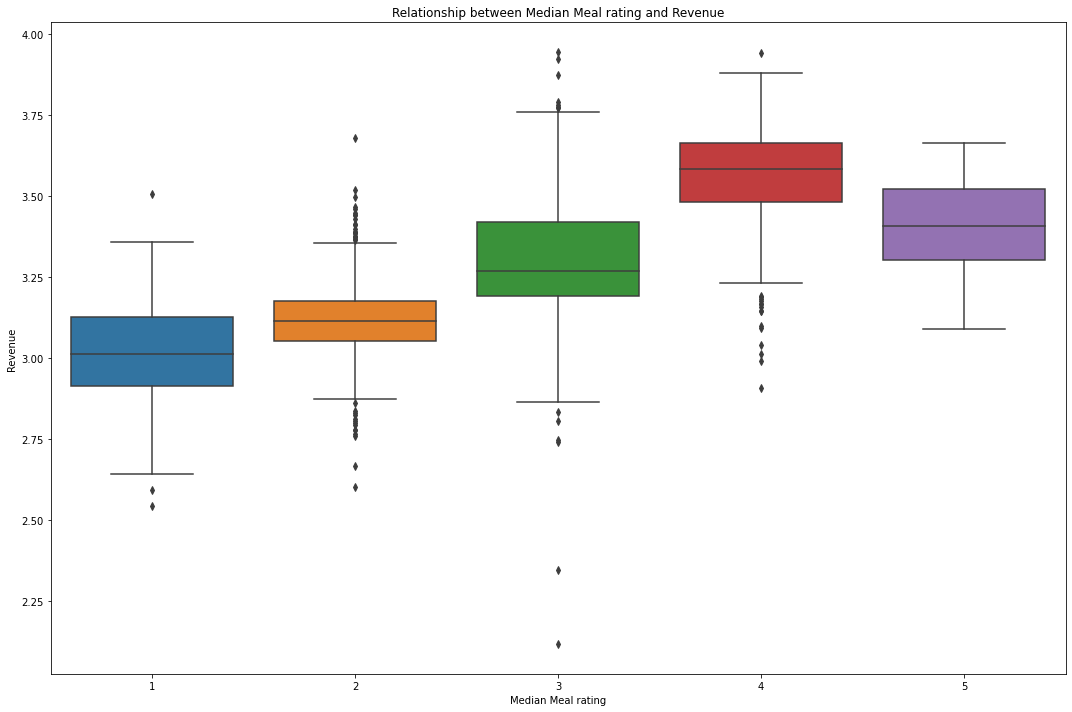

3    1087
2     487
4     260
1      99
5      13
Name: MEDIAN_MEAL_RATING, dtype: int64


In [50]:
#setting figure size
fig, ax = plt.subplots(figsize = (15,10))
                       

#creating boxplot
sns.boxplot(x = 'MEDIAN_MEAL_RATING',
           y = 'LOG_REVENUE',
           data = chef)

# titles and labels
plt.title(label   = 'Relationship between Median Meal rating and Revenue')
plt.xlabel(xlabel = 'Median Meal rating')
plt.ylabel(ylabel = 'Revenue')

plt.tight_layout()
plt.show()

#analyzing distribution of variable
print(chef['MEDIAN_MEAL_RATING'].value_counts())

In [51]:
#creating dummy variable
rating_dummy = pd.get_dummies(chef['MEDIAN_MEAL_RATING'])

#renaming columns of dummy dataset
rating_dummy.columns = ['ONE_MEDIAN_MEAL_RATING', 'TWO_MEDIAN_MEAL_RATING', 
                       'THREE_MEDIAN_MEAL_RATING', 'FOUR_MEDIAN_MEAL_RATING',
                       'FIVE_MEDIAN_MEAL_RATING']

#adding new dummy variables to chef dataset
chef = chef.join([rating_dummy.iloc[:, 1:4]])

## Average Clicks per Visit

Creating Feature: Above 10 Clicks per Visit

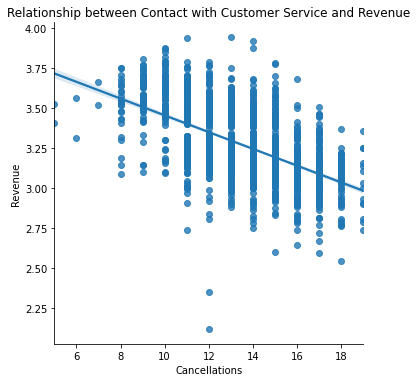

In [52]:
#setting figure size
#fig, ax = plt.subplots(figsize = (15,10))
                       

#creating boxplot
sns.lmplot(x = 'AVG_CLICKS_PER_VISIT',
           y = 'LOG_REVENUE',
           data = chef)

# titles and labels
plt.title(label   = 'Relationship between Contact with Customer Service and Revenue')
plt.xlabel(xlabel = 'Cancellations')
plt.ylabel(ylabel = 'Revenue')

#plt.tight_layout()
plt.show()

In [53]:
#creating placeholder list
placeholder_lst = []

#looping over Average click per visit feature
for item in chef['AVG_CLICKS_PER_VISIT']:
    if item > 10:
        placeholder_lst.append(1)
        
    else:
        placeholder_lst.append(0)

#transforming list to Series and adding to dataset
chef['AVG_CLICKS_PER_VISIT_ABOVETEN'] = pd.Series(placeholder_lst)

## Analysis of Log Transformation of Features

In [54]:
# developing a small correlation matrix
log_corr = chef.corr()    # .round(decimals = 2)


# checking the correlations of the newly-created variables with Sale_Price
log_corr.loc['LOG_REVENUE',                                   # Y-variable
               ['TOTAL_CANCELLATIONS', 'LOG_TOTAL_CANCELLATIONS', 
                     'CONTACTS_W_CUSTOMER_SERVICE', 'LOG_CONTACTS_W_CUSTOMER_SERVICE',
                    'CONTACTS_W_CUSTOMER_SERVICE_PMO', 'LOG_CONTACTS_W_CUSTOMER_SERVICE_PMO',
                    'TOTAL_MEALS_ORDERED', 'LOG_TOTAL_MEALS_ORDERED',
                    'UNIQUE_MEALS_PURCH_PMO', 'LOG_UNIQUE_MEALS_PURCH_PMO',
                    'AVG_TIME_PER_SITE_VISIT', 'LOG_AVG_TIME_PER_SITE_VISIT',
                    'AVG_PREP_VID_TIME', 'LOG_AVG_PREP_VID_TIME',
                    'AVG_NUMBER_MEALS', 'LOG_AVG_NUMBER_MEALS',
                    'TOTAL_PHOTOS_VIEWED', 'LOG_TOTAL_PHOTOS_VIEWED']] 
              

TOTAL_CANCELLATIONS                   -0.002321
LOG_TOTAL_CANCELLATIONS                0.001433
CONTACTS_W_CUSTOMER_SERVICE           -0.036922
LOG_CONTACTS_W_CUSTOMER_SERVICE        0.054247
CONTACTS_W_CUSTOMER_SERVICE_PMO        0.437861
LOG_CONTACTS_W_CUSTOMER_SERVICE_PMO    0.566023
TOTAL_MEALS_ORDERED                    0.609341
LOG_TOTAL_MEALS_ORDERED                0.694344
UNIQUE_MEALS_PURCH_PMO                -0.579982
LOG_UNIQUE_MEALS_PURCH_PMO            -0.641296
AVG_TIME_PER_SITE_VISIT                0.144359
LOG_AVG_TIME_PER_SITE_VISIT            0.152475
AVG_PREP_VID_TIME                      0.650876
LOG_AVG_PREP_VID_TIME                  0.669793
AVG_NUMBER_MEALS                       0.445519
LOG_AVG_NUMBER_MEALS                   0.445989
TOTAL_PHOTOS_VIEWED                    0.431117
LOG_TOTAL_PHOTOS_VIEWED                0.428127
Name: LOG_REVENUE, dtype: float64

In [55]:
#dropping variables with less correlation to Log_Revenue
chef = chef.drop(['LOG_TOTAL_CANCELLATIONS', 
            'CONTACTS_W_CUSTOMER_SERVICE',
            'CONTACTS_W_CUSTOMER_SERVICE_PMO', 
            'TOTAL_MEALS_ORDERED', 
            'UNIQUE_MEALS_PURCH_PMO',
            'AVG_TIME_PER_SITE_VISIT',
            'AVG_PREP_VID_TIME',
            'AVG_NUMBER_MEALS', 
            'LOG_TOTAL_PHOTOS_VIEWED'], axis = 1)

# Splitting Data

In [56]:
#seperating datasets into explanatory and target
chef_expl = chef.drop(['EMAIL', 'EMAIL_DOMAIN','REVENUE', 'MOBILE_LOGINS', 'LOG_REVENUE'], 
                      axis = 1)

chef_target = chef['REVENUE']
chef_target_log = chef['LOG_REVENUE']


#splitting into x_train, x_test, y_train, y_test with all variables
x_train, x_test, y_train, y_test = train_test_split(
    chef_expl, 
    chef_target_log,
    test_size = 0.25,
    random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 48)
y-side: (1459,)


Testing Data
------------
X-side: (487, 48)
y-side: (487,)



# Developing Models

## Ordinary Least Squares (OLS)

In [57]:
# preparing the independent variables
for column in chef_expl:
    print(column, '+')

CROSS_SELL_SUCCESS +
UNIQUE_MEALS_PURCH +
PRODUCT_CATEGORIES_VIEWED +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
EVER_WEEKLY_PLAN +
PHOTOS_VIEWED_AT_ALL +
PUNCTUAL_DELIVERIES +
CANCELLATIONS +
TOTAL_CANCELLATIONS +
CANCELLATION_AFTER_NOON_PMO +
LOG_CONTACTS_W_CUSTOMER_SERVICE +
CONTACTS_W_CUSTOMER_SERVICE_ABOVETEN +
LOG_CONTACTS_W_CUSTOMER_SERVICE_PMO +
CS_PMO_MIN_2 +
TOTAL_MEALS_ABOVE20 +
MIN_125_MEALS_ORDERED +
LOG_TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH_PMO_ABOVE25 +
LOG_UNIQUE_MEALS_PURCH_PMO +
LOG_AVG_TIME_PER_SITE_VISIT +
LOG_AVG_PREP_VID_TIME +
LOG_AVG_NUMBER_MEALS +
PHOTOS_PER_TIME_ONLINE +
CUSTOMIZED +
JUNK_MAIL +
PERSONAL_MAIL +
PROFESSIONAL_MAIL +
FEMALE +
MALE +
ONE_MASTER_CLASSES_ATTENDED +
TWO_MASTER_CLASSES_ATTENDED +
TWO_MEDIA

In [58]:
###################
#LOG_REVENUE - fit model
####################

#adding dependent variable to training dataset
chef_train = pd.concat([x_train, y_train], axis = 1)

#running statsmodels - instantiating
lm_full = smf.ols(formula = """LOG_REVENUE ~ CROSS_SELL_SUCCESS +
                                            UNIQUE_MEALS_PURCH +
                                            CANCELLATIONS_AFTER_NOON +
                                            EARLY_DELIVERIES +
                                            PACKAGE_LOCKER +
                                            TOTAL_PHOTOS_VIEWED +
                                            PHOTOS_VIEWED_AT_ALL +
                                            CANCELLATION_AFTER_NOON_PMO +
                                            CONTACTS_W_CUSTOMER_SERVICE_ABOVETEN +
                                            LOG_CONTACTS_W_CUSTOMER_SERVICE_PMO +
                                            CS_PMO_MIN_2 +
                                            LOG_TOTAL_MEALS_ORDERED +
                                            LOG_UNIQUE_MEALS_PURCH_PMO +
                                            LOG_AVG_PREP_VID_TIME +
                                            LOG_AVG_NUMBER_MEALS +
                                            JUNK_MAIL +
                                            PERSONAL_MAIL +
                                            PROFESSIONAL_MAIL +
                                            ONE_MASTER_CLASSES_ATTENDED +
                                            TWO_MASTER_CLASSES_ATTENDED +
                                            THREE_MEDIAN_MEAL_RATING +
                                            FOUR_MEDIAN_MEAL_RATING +
                                            AVG_CLICKS_PER_VISIT_ABOVETEN
                                            """,
                   data = chef_train)


#fitting the model
results = lm_full.fit()

#analyzing results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            LOG_REVENUE   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     269.8
Date:                Sun, 21 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:35:13   Log-Likelihood:                 1377.3
No. Observations:                1459   AIC:                            -2711.
Df Residuals:                    1437   BIC:                            -2594.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [59]:
#declaring x-variables from statsmodel OLS
x_variables = ['CROSS_SELL_SUCCESS','UNIQUE_MEALS_PURCH',
               'CANCELLATIONS_AFTER_NOON','EARLY_DELIVERIES','PACKAGE_LOCKER',
               'TOTAL_PHOTOS_VIEWED','PHOTOS_VIEWED_AT_ALL',
               'CANCELLATION_AFTER_NOON_PMO',
               'CONTACTS_W_CUSTOMER_SERVICE_ABOVETEN',
               'LOG_CONTACTS_W_CUSTOMER_SERVICE_PMO','CS_PMO_MIN_2',
               'LOG_TOTAL_MEALS_ORDERED','LOG_UNIQUE_MEALS_PURCH_PMO',
               'LOG_AVG_PREP_VID_TIME','LOG_AVG_NUMBER_MEALS','JUNK_MAIL',
               'PERSONAL_MAIL','PROFESSIONAL_MAIL',
               'ONE_MASTER_CLASSES_ATTENDED','TWO_MASTER_CLASSES_ATTENDED',
               'THREE_MEDIAN_MEAL_RATING','FOUR_MEDIAN_MEAL_RATING',
               'AVG_CLICKS_PER_VISIT_ABOVETEN']

#splitting data for OLS
ols_data = chef[x_variables]


##########################
#Setting up 2 different train_test splits
##########################


#splitting into x_train, x_test, y_train, y_test with all variables
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
    chef_expl, 
    chef_target_log,
    test_size = 0.25,
    random_state = 219)

#splitting data with OLS variables
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
    ols_data,
    chef_target_log,
    test_size = 0.25,
    random_state = 219)

In [60]:
#OLS regression ins ScikitLearn - instantiate
lr = sklearn.linear_model.LinearRegression()

#fit the model
lr_fit = lr.fit(x_train_OLS, y_train_OLS)

#predict on the model
lm_predict = lr_fit.predict(x_test_OLS)



# zipping each feature name to its coefficient
lr_model_values = zip(chef[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

#setting variable
x = 6

#loop to delete coefficients
while x > 0:
    
    for feature, coefficient in lr_model_lst:
        
        if coefficient == 0:
            lr_model_lst.remove((feature, coefficient))
    
    x -= 1   
    
    
#Scoring the results
model_type_1 = "OLS Regression"
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)
model_size = len(lr_model_lst)


#printing model output
print(f"""
These are the results of the {model_type_1} model
-------------------------------------------------
Training Score : {lr_train_score}
Testing Score  : {lr_test_score}
Train-Test Gap : {lr_test_gap}
Model Size     : {model_size}

""")
for pair in lr_model_lst:
    print(pair)
    
    
# creating a dictionary for model results
model_performance_ols = {
    
    'Model Type'    : [model_type_1],
    
    
    'Training' : [lr_train_score],
                  
           
    'Testing'  : [lr_test_score],
    
    
    'Train-Test Gap' : [lr_test_gap],
                   
    
    'Model Size' : [model_size],
                    
    'Model'      : [lr_model_lst],
    
    'Final'      : ["No"]}


These are the results of the OLS Regression model
-------------------------------------------------
Training Score : 0.7977
Testing Score  : 0.7862
Train-Test Gap : 0.0115
Model Size     : 19


('intercept', 1.82)
('CROSS_SELL_SUCCESS', -0.01)
('UNIQUE_MEALS_PURCH', 0.05)
('CANCELLATIONS_AFTER_NOON', 0.02)
('PACKAGE_LOCKER', -0.01)
('PHOTOS_VIEWED_AT_ALL', 0.01)
('CANCELLATION_AFTER_NOON_PMO', -1.1)
('CONTACTS_W_CUSTOMER_SERVICE_ABOVETEN', -0.09)
('LOG_CONTACTS_W_CUSTOMER_SERVICE_PMO', -0.24)
('CS_PMO_MIN_2', 0.09)
('LOG_TOTAL_MEALS_ORDERED', -0.19)
('LOG_UNIQUE_MEALS_PURCH_PMO', -0.58)
('LOG_AVG_PREP_VID_TIME', 0.51)
('LOG_AVG_NUMBER_MEALS', -0.13)
('ONE_MASTER_CLASSES_ATTENDED', 0.03)
('TWO_MASTER_CLASSES_ATTENDED', 0.06)
('THREE_MEDIAN_MEAL_RATING', 0.04)
('FOUR_MEDIAN_MEAL_RATING', 0.14)
('AVG_CLICKS_PER_VISIT_ABOVETEN', -0.04)


## Lasso Regression Model

In [61]:
#INSTANTIATE the model
lasso_model = sklearn.linear_model.Lasso(alpha = 0.1, normalize = False)

#Fit the model
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)

#predicting on new data
lasso_predict = lasso_fit.predict(x_test_FULL)

# SCORING the results
model_type_2 = "Lasso Regression"
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4)
lasso_test_score = lasso_model.score(x_test_FULL, y_test_FULL).round(4)
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)


# zipping each feature name to its coefficient
lasso_model_values = zip(chef_expl.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)

#setting variable
x = 6

#loop to delete coefficients
while x > 0:
    
    for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))
    
    x -= 1
  
    
# calculating model size    
model_size_lasso = len(lasso_model_lst)

 #printing model output
print(f"""
These are the results of the {model_type_2} model
---------------------------------------------------
Training Score : {lasso_train_score}
Testing Score  : {lasso_test_score}
Train-Test Gap : {lasso_test_gap}
Model Size     : {model_size_lasso}

""")   
    
# checking the results
for pair in lasso_model_lst:
    print(pair)
    

# creating a dictionary for model results
model_performance_lasso = {
    
    'Model Type'    : [model_type_2],
    
    
    'Training' : [lasso_train_score],
                  
           
    'Testing'  : [lasso_test_score],
    
    
    'Train-Test Gap' : [lasso_test_gap],
                   
    
    'Model Size' : [model_size_lasso],
                    
    'Model'      : [lasso_model_lst],

    'Final'      : ["No"]}


These are the results of the Lasso Regression model
---------------------------------------------------
Training Score : 0.3522
Testing Score  : 0.3396
Train-Test Gap : 0.0126
Model Size     : 2


('intercept', 3.54)
('AVG_CLICKS_PER_VISIT', -0.02)


## ARD Regression Model

In [62]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


# saving scoring data for future use
model_type_3 = "ARD Regression"
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)


# zipping each feature name to its coefficient
ard_model_values = zip(chef_expl.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

#setting variable
x = 6

#loop to delete coefficients
while x > 0:
    
    for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))
    
    x -= 1
  
    
#calculating model size    
model_size_ard = len(ard_model_lst)

 #printing model output
print(f"""
These are the results of the {model_type_3} model
---------------------------------------------------
Training Score : {ard_train_score}
Testing Score  : {ard_test_score}
Train-Test Gap : {ard_test_gap}
Model Size     : {model_size_ard}

""")   
    
# checking the results
for pair in ard_model_lst:
    print(pair)
    

# creating a dictionary for model results
model_performance_ard = {
    
    'Model Type'    : [model_type_3],
    
    
    'Training' : [ard_train_score],
                  
           
    'Testing'  : [ard_test_score],
    
    
    'Train-Test Gap' : [ard_test_gap],
                   
    
    'Model Size' : [model_size_ard],
                    
    'Model'      : [ard_model_lst],
    
    'Final'      : ["Yes"]}


These are the results of the ARD Regression model
---------------------------------------------------
Training Score : 0.7962
Testing Score  : 0.7916
Train-Test Gap : 0.0046
Model Size     : 21


('intercept', 1.74)
('CROSS_SELL_SUCCESS', -0.01195)
('UNIQUE_MEALS_PURCH', 0.04702)
('REFRIGERATED_LOCKER', -0.01235)
('MEDIAN_MEAL_RATING', 0.01527)
('PHOTOS_VIEWED_AT_ALL', 0.02249)
('CANCELLATION_AFTER_NOON_PMO', -0.54639)
('LOG_CONTACTS_W_CUSTOMER_SERVICE', -0.00036)
('CONTACTS_W_CUSTOMER_SERVICE_ABOVETEN', -0.09127)
('LOG_CONTACTS_W_CUSTOMER_SERVICE_PMO', -0.24603)
('CS_PMO_MIN_2', 0.09127)
('TOTAL_MEALS_ABOVE20', -0.00901)
('LOG_TOTAL_MEALS_ORDERED', -0.16636)
('LOG_UNIQUE_MEALS_PURCH_PMO', -0.57663)
('LOG_AVG_PREP_VID_TIME', 0.52081)
('LOG_AVG_NUMBER_MEALS', -0.1305)
('ONE_MASTER_CLASSES_ATTENDED', 0.03036)
('TWO_MASTER_CLASSES_ATTENDED', 0.05936)
('THREE_MEDIAN_MEAL_RATING', 0.02245)
('FOUR_MEDIAN_MEAL_RATING', 0.11958)
('AVG_CLICKS_PER_VISIT_ABOVETEN', -0.02978)


## KNN Model

### Full Data

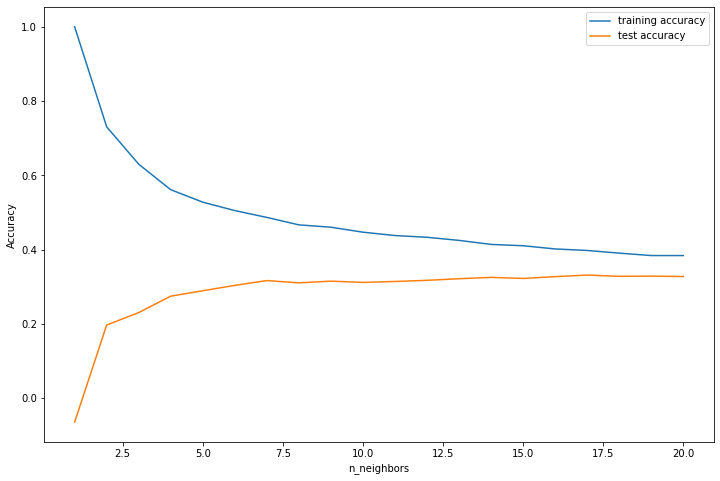

The optimal number of neighbors is 17


In [63]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train_FULL, y_train_FULL)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train_FULL, y_train_FULL))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test_FULL, y_test_FULL))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# finding the optimal number of neighbors
opt_neighbors_full = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors_full}""")

In [64]:
# INSTANTIATING a model with the optimal number of neighbors
knn_full = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = opt_neighbors_full)



# FITTING the model based on the training data
knn_full_fit = knn_full.fit(x_train_FULL, y_train_FULL)



# PREDITCING on new data
knn_full_pred = knn_full_fit.predict(x_test_FULL)


# saving scoring data for future use
knn_full_score_train = knn_full.score(x_train_FULL, y_train_FULL).round(4)
knn_full_score_test  = knn_full.score(x_test_FULL, y_test_FULL).round(4)
knn_full_test_gap = abs(knn_full_score_train - knn_full_score_test).round(4)


# SCORING the results
print('KNN Training Score:', knn_full_score_train)
print('KNN Testing Score :',  knn_full_score_test)
print('KNN Train-Test Gap:', knn_full_test_gap)


KNN Training Score: 0.3978
KNN Testing Score : 0.3315
KNN Train-Test Gap: 0.0663


### Optimized Data

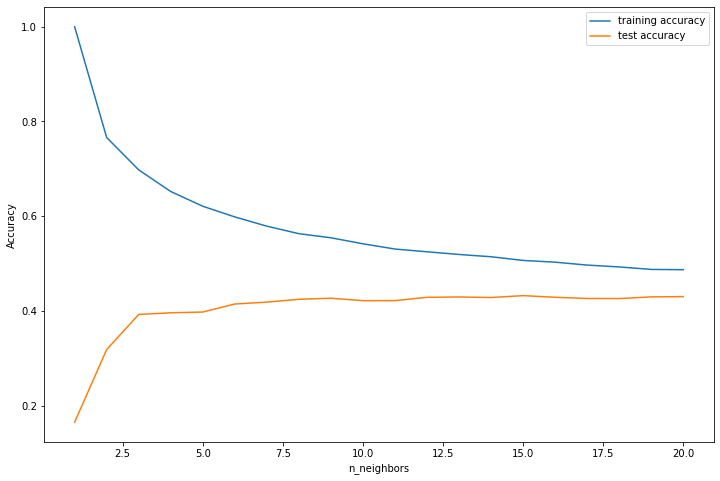

The optimal number of neighbors is 15


In [65]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train_OLS, y_train_OLS)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train_OLS, y_train_OLS))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test_OLS, y_test_OLS))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# finding the optimal number of neighbors
opt_neighbors_ols = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors_ols}""")

In [66]:
# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = opt_neighbors_ols)



# FITTING the model based on the training data
knn_opt_fit = knn_opt.fit(x_train_OLS, y_train_OLS)



# PREDITCING on new data
knn_opt_pred = knn_opt_fit.predict(x_test_OLS)


# saving scoring data for future use
knn_opt_score_train = knn_opt.score(x_train_OLS, y_train_OLS).round(4)
knn_opt_score_test  = knn_opt.score(x_test_OLS, y_test_OLS).round(4)
knn_opt_test_gap = abs(knn_opt_score_train - knn_opt_score_test).round(4)


# SCORING the results
print('KNN Training Score:', knn_opt.score(x_train_OLS, y_train_OLS).round(4))
print('KNN Testing Score :',  knn_opt.score(x_test_OLS, y_test_OLS).round(4))
print('KNN Train-Test Gap:', abs(knn_opt_score_train - knn_opt_score_test).round(4))


KNN Training Score: 0.5065
KNN Testing Score : 0.4322
KNN Train-Test Gap: 0.0743


### Standardized Data

In [67]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(chef_expl)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(chef_expl)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# adding labels to the scaled DataFrame
x_scaled_df.columns = chef_expl.columns

# checking the results
x_scaled_df.describe().round(2)

,CROSS_SELL_SUCCESS,UNIQUE_MEALS_PURCH,PRODUCT_CATEGORIES_VIEWED,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,...,PERSONAL_MAIL,PROFESSIONAL_MAIL,FEMALE,MALE,ONE_MASTER_CLASSES_ATTENDED,TWO_MASTER_CLASSES_ATTENDED,TWO_MEDIAN_MEAL_RATING,THREE_MEDIAN_MEAL_RATING,FOUR_MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT_ABOVETEN
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,...,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.45,-1.56,-1.44,-2.68,-0.91,-0.38,-1.58,-2.61,-0.83,-0.64,...,-0.89,-0.75,-0.28,-0.57,-0.89,-0.29,-0.58,-1.12,-0.39,-3.05
25%,-1.45,-0.76,-0.78,0.37,-0.91,-0.38,-1.58,-0.89,-0.76,-0.64,...,-0.89,-0.75,-0.28,-0.57,-0.89,-0.29,-0.58,-1.12,-0.39,0.33
50%,0.69,0.04,-0.13,0.37,-0.26,-0.38,0.63,0.83,-0.32,-0.64,...,-0.89,-0.75,-0.28,-0.57,-0.89,-0.29,-0.58,0.89,-0.39,0.33
75%,0.69,0.84,0.86,0.37,0.38,-0.38,0.63,0.83,0.12,0.65,...,1.12,1.34,-0.28,-0.57,1.13,-0.29,1.15,0.89,-0.39,0.33
max,0.69,5.63,1.52,0.37,7.48,6.56,0.63,2.56,3.00,3.24,...,1.12,1.34,3.52,1.75,1.13,3.46,1.73,0.89,2.55,0.33


In [68]:
# this is the exact code we were using before
X_train_STAND, X_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            x_scaled_df,
            chef_target_log,
            test_size = 0.25,
            random_state = 219)

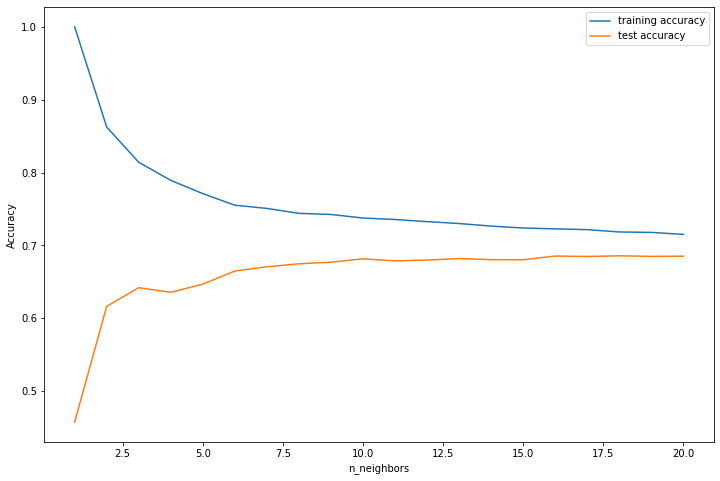

The optimal number of neighbors is 18


In [69]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test_STAND, y_test_STAND))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy,     label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# finding the optimal number of neighbors
opt_neighbors_stand = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors_stand}""")

In [70]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                   n_neighbors = opt_neighbors_stand)



# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(X_train_STAND, y_train_STAND)



# PREDITCING on new data
knn_stand_pred = knn_stand_fit.predict(X_test_STAND)



# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train_STAND, y_train_STAND).round(4)
knn_stand_score_test  = knn_stand.score(X_test_STAND, y_test_STAND).round(4)
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(4)


# SCORING the results
print('KNN Training Score:', knn_stand.score(X_train_STAND, y_train_STAND).round(4))
print('KNN Testing Score :',  knn_stand.score(X_test_STAND, y_test_STAND).round(4))
print('KNN Train-Test Gap:', abs(knn_stand_score_train - knn_stand_score_test).round(4))


KNN Training Score: 0.7184
KNN Testing Score : 0.6858
KNN Train-Test Gap: 0.0326


In [71]:
# comparing results

print(f"""
KNN Model                         Neighbors     Train Score      Test Score
----------------                  ---------     ----------       ----------
Non-Standardized - FULL           17             {knn_full_score_train}           {knn_full_score_test}
Non-Standardized - Optimized      15             {knn_opt_score_train}           {knn_opt_score_test}
Standardized                      18             {knn_stand_score_train}           {knn_stand_score_test}
""")


# creating a dictionary for model results
model_performance_knn = {
    
    'Model Type'    : ['KNN_NS_1', 'KNN_NS_5', 'KNN_S_6'],
    
    
    'Training' : [knn_full_score_train,
                  knn_opt_score_train,
                  knn_stand_score_train],
           
    'Testing'  : [knn_full_score_test,
                  knn_opt_score_test,
                  knn_stand_score_test],
    
    
    'Train-Test Gap' : [knn_full_test_gap,
                        knn_opt_test_gap,
                        knn_stand_test_gap],
                   
    
    'Model Size' : ["NA", " NA", " NA"],
                    
    'Model'      : ["NA","NA","NA"],

    'Final'      : ["No", "No", "no"]}


KNN Model                         Neighbors     Train Score      Test Score
----------------                  ---------     ----------       ----------
Non-Standardized - FULL           17             0.3978           0.3315
Non-Standardized - Optimized      15             0.5065           0.4322
Standardized                      18             0.7184           0.6858



# Conclusion

In [72]:
#preparing for final table
model_performance_ols = pd.DataFrame(model_performance_ols)
model_performance_lasso = pd.DataFrame(model_performance_lasso)
model_performance_ard = pd.DataFrame(model_performance_ard)
model_performance_knn = pd.DataFrame(model_performance_knn)

total_performance = pd.concat([model_performance_ols, model_performance_lasso,
                              model_performance_ard, model_performance_knn],
                             axis = 0)

#sorting the dataset by testing results
total_performance.sort_values(by = 'Testing',
                              ascending = False)


#sending model results to Excel
total_performance.to_excel('./datasets/linear_model_performance.xlsx',
                           index = False)



#presenting the final results
total_performance

,Model Type,Training,Testing,Train-Test Gap,Model Size,Model,Final
0,OLS Regression,0.7977,0.7862,0.0115,19,"[(intercept, 1.82), (CROSS_SELL_SUCCESS, -0.01...",No
0,Lasso Regression,0.3522,0.3396,0.0126,2,"[(intercept, 3.54), (AVG_CLICKS_PER_VISIT, -0....",No
0,ARD Regression,0.7962,0.7916,0.0046,21,"[(intercept, 1.74), (CROSS_SELL_SUCCESS, -0.01...",Yes
0,KNN_NS_1,0.3978,0.3315,0.0663,NA,NA,No
1,KNN_NS_5,0.5065,0.4322,0.0743,NA,NA,No
2,KNN_S_6,0.7184,0.6858,0.0326,NA,NA,no


<b>The final model is the ARD Regression model!</b>